In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.random.seed(42)

/Users/seohohahm/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('thads2013n.txt')

In [4]:
df.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,ABL80,ABLMED,BURDEN,INCRELAMIPCT,INCRELAMICAT,INCRELPOVPCT,INCRELPOVCAT,INCRELFMRPCT,INCRELFMRCAT,COST06RELAMIPCT,COST06RELAMICAT,COST06RELPOVPCT,COST06RELPOVCAT,COST06RELFMRPCT,COST06RELFMRCAT,COST08RELAMIPCT,COST08RELAMICAT,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,33702.428571,51842.571429,66364.20,0.354919,34.913187,2,162.835457,3,47.126046,1,39.092655,2,234.422405,4,67.843953,2,42.004891,2,251.885876,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,33180.640000,53063.040000,64781.36,0.047527,220.178706,7,507.725659,4,279.456818,3,72.097331,4,192.855030,3,106.149162,3,81.793356,4,218.791183,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,33200.650000,53090.300000,64781.36,0.602703,62.614153,4,180.827408,3,63.577273,2,73.687444,4,308.569673,4,108.490292,3,84.875166,5,355.418791,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,29766.100000,47598.200000,58079.84,0.103911,72.117967,4,230.736179,4,84.878820,2,108.737050,6,452.265142

In [6]:
df = df[df.ASSISTED != -9]

In [7]:
for column in df.columns:
    df[column] = df[column].astype(str).str.replace("'","")

In [8]:
df.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,ABL80,ABLMED,BURDEN,INCRELAMIPCT,INCRELAMICAT,INCRELPOVPCT,INCRELPOVCAT,INCRELFMRPCT,INCRELFMRCAT,COST06RELAMIPCT,COST06RELAMICAT,COST06RELPOVPCT,COST06RELPOVCAT,COST06RELFMRPCT,COST06RELFMRCAT,COST08RELAMIPCT,COST08RELAMICAT,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
4,100007130148,26,1,3,60991,737,14801,24628,39421,15492,2,1980,1,1,-6,-6,2,100,4,2314.5249016999996,2,96874,1,759,5,2,146.0,12.5,759.0,759.0,759.0,759.0,96900,0,60991,14801,24628,39421,48792.8,16651.125,27706.5,44348.625,54891.9,0.094019035,198.5415881,7,625.31629228,4,328.60922659,3,55.308706748999995,3,195.97211464,3,102.98507463,3,55.308706748999995,3,195.97211464,3,102.98507463,3,55.308706748999995,3,195.97211464,3,102.98507463,3,55.308706748999995,3,195.97211464,3,102.98507463,3,1 Adequate,Central City,1980-1989,5 50+ units,2 2BR,2 Renter,3 150-200% Poverty,3 150-200% Poverty,3 150-200% Poverty,3 150-200% Poverty,4 200%+ Poverty,3 GT FMR,3 GT FMR,3 GT FMR,3 GT FMR,3 GT FMR,3 50 - 60% AMI,3 50 - 60% AMI,3 50 - 60% AMI,3 50 - 60% AMI,7 120% AMI +,0 Not Assisted,1 Less than 30%,-5,-5
5,100007390148,56,2,3,62066,657,13170,21924,35073,12005,1,1985,1,1,-6,-6,2,32,3,2482.6559159000003,1,14987,1,695,4,2,94.75,0.0,695.0,695.0,695.0,695.0,15000,1,62066,13170,21924,35073,43446.2,14110.714286000002,23490.0,37578.214286,46549.5,0.5564822846,34.495537009,2,124.83965015,2,57.028158295,2,59.721371873,3,231.57017909,4,105.78386606,3,59.721371873,3,231.57017909,4,105.78386606,3,59.721371873,3,231.57017909,4,105.78386606,3,59.721371873,3,231.57017909,4,105.78386606,3,1 Adequate,-5,1980-1989,4 20-49 units,1 1BR,2 Renter,4 200%+ Poverty,4 200%+ Poverty,4 200%+ Poverty,4 200%+ Poverty,2 100-150% Poverty,3 GT FMR,3 GT FMR,3 GT FMR,3 GT FMR,2 50.1 - 100% FMR,3 50 - 60% AMI,3 50 - 60% AMI,3 50 - 60% AMI,3 50 - 60% AMI,2 30 - 50% AMI,1 Assisted,3 50% or More,-5,-5
7,100008700141,26,4,4,52322,773,13489,22471,35929,15992,2,1980,1,1,-6,-6,2,8,5,2823.3959901999997,2,32000,2,976,3,2,81.0,0.0,976.0,976.0,976.0,976.0,20000,0,52322,13489,22471,35929,41857.6,15175.125,25279.875,40420.125,47089.8,0.366,76.44967700000001,4,200.10005003,4,103.49288486,3,82.905427502,4,244.12206103,4,126.26131953,3,82.905427502,4,244.12206103,4,126.26131953,3,82.905427502,4,244.12206103,4,126.26131953,3,82.905427502,4,244.12206103,4,126.26131953,3,2 Moderately Inadequ,-5,1980-1989,3 5-19 units,2 2BR,2 Renter,4 200%+ Poverty,4 200%+ Poverty,4 200%+ Poverty,4 200%+ Poverty,4 200%+ Poverty,3 GT FMR,3 GT FMR,3 GT FMR,3 GT FMR,3 GT FMR,4 60 - 80% AMI,4 60 - 80% AMI,4 60 - 80% AMI,4 60 - 80% AMI,4 60 - 80% AMI,0 Not Assisted,2 30% to 50%,West,-5
9,100009170148,26,4,2,63221,552,13338,22199,35501,12005,1,1985,1,1,-6,-6,2,24,3,2845.4544321999997,1,47987,1,1100,4,2,0.0,0.0,1100.0,1100.0,1100.0,1100.0,48000,0,63221,13338,22199,35501,44254.7,14290.714286000002,23784.642857,38036.785714,47415.75,0.2750744993,108.43368049,6,399.72511454,4,217.33242754,3,92.796170049,5,366.51395252,4,199.27536232,3,92.796170049,5,366.51395252,4,199.27536232,3,92.796170049,5,366.51395252,4,199.27536232,3,92.796170049,5,366.51395252,4,199.27536232,3,1 Adequate,-5,1980-1989,4 20-49 units,1 1

In [9]:
df = df.apply(pd.to_numeric, errors='ignore')

In [11]:
def multicolinearity_check(df):
    sns.set_context('notebook')
    fig = plt.figure(figsize=(15,15))
    ax = sns.heatmap(df.corr(), center=0, vmin=-1, cmap=(sns.diverging_palette(240, 10, sep=80, n=20)), annot=round(df.corr(),2));
    return plt.show();

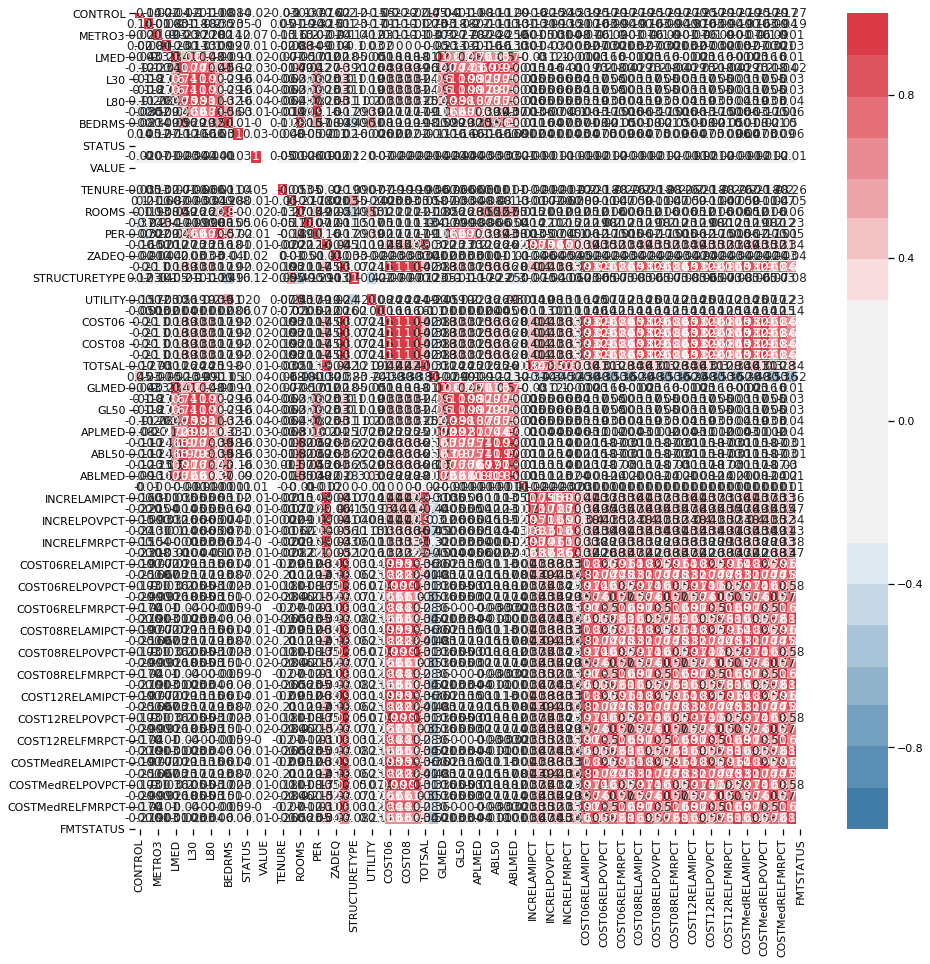

In [12]:
multicolinearity_check(df)

In [48]:
df.corr()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L50,BEDRMS,BUILT,TYPE,VALUE,NUNITS,WEIGHT,PER,ZSMHC,STRUCTURETYPE,UTILITY,OTHERCOST,TOTSAL,ASSISTED,BURDEN
CONTROL,1.000000,0.136373,-0.021688,0.017029,-0.041752,-0.121113,-0.100362,-0.076228,0.138103,-0.024305,NaN,0.095902,-0.369512,-0.070575,-0.201368,0.115914,-0.152836,-0.053263,-0.170309,0.453205,-0.002537
AGE1,0.136373,1.000000,0.008990,-0.080365,0.029859,-0.097609,-0.183929,-0.226979,0.048944,-0.000321,NaN,0.214833,-0.235500,-0.321375,-0.103263,0.230619,-0.168390,-0.007625,-0.266480,0.229841,0.008881
METRO3,-0.021688,0.008990,1.000000,0.092900,-0.303365,-0.232561,-0.268261,0.141892,0.118197,0.067929,NaN,-0.156166,0.200052,0.023429,-0.098742,-0.139683,0.121112,0.033273,-0.028132,-0.068379,-0.001642
REGION,0.017029,-0.080365,0.092900,1.000000,-0.232253,-0.007748,-0.127426,0.088859,0.272141,0.013090,NaN,-0.084607,0.338653,0.094382,0.003696,-0.097253,0.029595,0.021744,-0.001382,-0.054810,0.000930
LMED,-0.041752,0.029859,-0.303365,-0.232253,1.000000,0.411412,0.596402,-0.085988,-0.111010,-0.024687,NaN,0.074938,-0.174864,-0.011299,0.178540,0.047127,-0.051471,0.008776,0.105545,-0.019568,-0.002782
FMR,-0.121113,-0.097609,-0.232561,-0.007748,0.411412,1.000000,0.737590,0.555662,-0.116556,-0.031004,NaN,-0.067899,-0.011184,0.417803,0.387205,-0.206944,0.259661,0.038024,0.263508,-0.127543,-0.012290
L50,-0.100362,-0.183929,-0.268261,-0.127426,0.596402,0.737590,1.000000,0.293617,-0.155782,-0.036791,NaN,-0.032380,-0.086443,0.685616,0.312027,-0.099030,0.187873,0.007416,0.242829,-0.090563,-0.013549
BEDRMS,-0.076228,-0.226979,0.141892,0.088859,-0.085988,0.555662,0.293617,1.000000,0.009940,-0.002855,NaN,-0.277584,0.145479,0.566683,0.190929,-0.489800,0.509609,0.078750,0.179708,-0.146112,-0.012499
BUILT,0.138103,0.048944,0.118197,0.272141,-0.111010,-0.116556,-0.155782,0.009940,1.000000,0.033786,NaN,0.080980,0.046428,-0.020902,0.023965,0.156990,-0.020077,0.060660,-0.000621,0.098362,0.007127
TYPE,-0.024305,-0.000321,0.067929,0.013090,-0.024687,-0.031004,-0.036791,-0.002855,0.033786,1.000000,NaN,-0.009863,0.059862,-0.011579,-0.016896,0.119742,0.003138,0.071389,-0.010983,-0.040136,0.010993


In [ ]:
analysis_columns = ['']

In [16]:
df.VACANCY.value_counts()

-6    24245
Name: VACANCY, dtype: int64

In [50]:
analysis_cols = ['CONTROL', 'AGE1', 'METRO3','REGION','LMED','FMR','L50', 'BEDRMS', 'BUILT','TYPE', 'NUNITS', 'WEIGHT', 'PER', 'ZSMHC','STRUCTURETYPE', 'UTILITY', 'OTHERCOST', 'TOTSAL', 'ASSISTED', 'BURDEN']

In [51]:
df = df[analysis_cols]

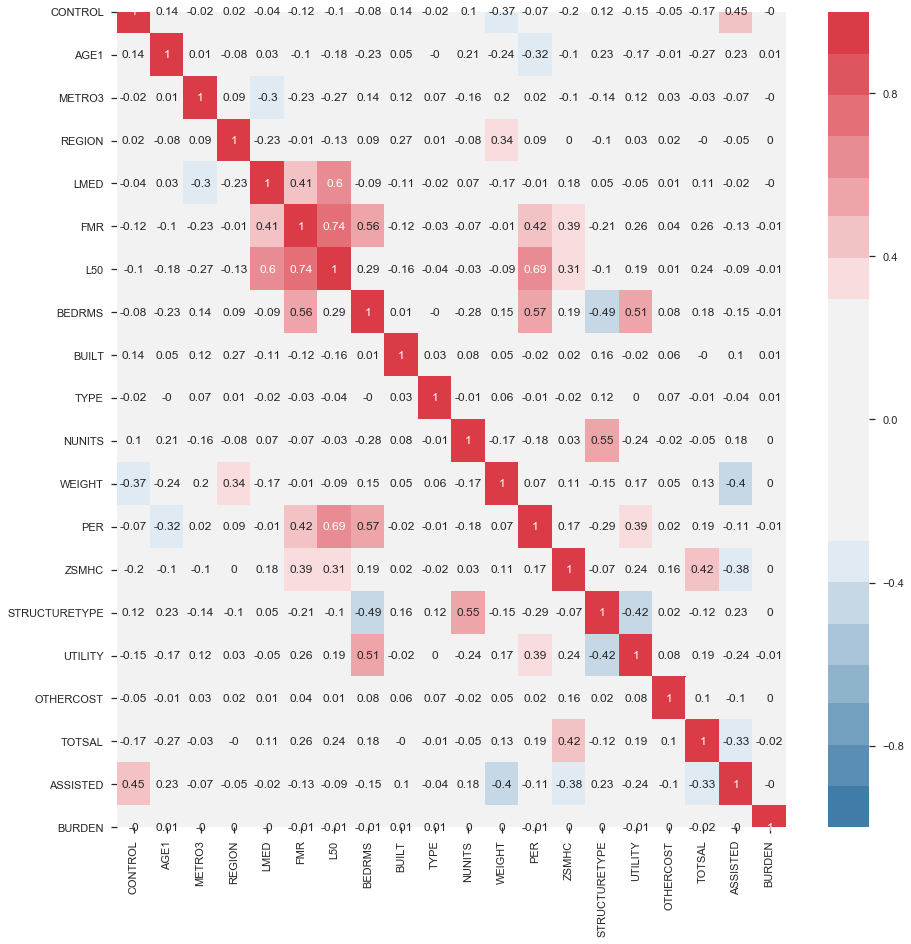

In [55]:
multicolinearity_check(df)

In [52]:
X = df.drop('ASSISTED', axis=1)
y = df.ASSISTED

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [59]:
#  always predicts the most frequent label in the training set
dummy0 = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy0.fit(X_train, y_train)
dummy0.score(X_test, y_test)

0.7269540111363167

/Users/seohohahm/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/seohohahm/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


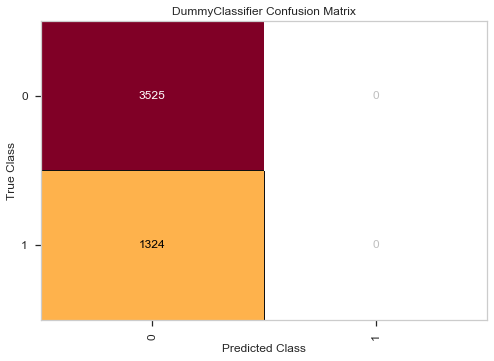

In [60]:
cm = ConfusionMatrix(dummy0);
cm.score(X_test, y_test);
cm.poof();

In [57]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

/Users/seohohahm/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ASSISTED   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     860.8
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:00:01   Log-Likelihood:                -8544.0
No. Observations:               24245   AIC:                         1.713e+04
Df Residuals:                   24225   BIC:                         1.729e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.9322      0.185    -10.445      0.000      -2.295      -1.570
CONTROL        4.182e-13   8.86e-15     47.208      0.000    4.01e-13    4.36e-13
AGE1              0.0015      0.000     10.940      0.000       0.001       0.002
METRO3           -0.0086      0.002     -3.998      0.000      -0.013      -0.004
REGION            0.0070      0.002      2.906      0.004       0.002       0.012
LMED          -1.165e-06   3.78e-07     -3.083      0.002   -1.91e-06   -4.25e-07
FMR            4.214e-05   1.65e-05      2.558      0.011    9.85e-06    7.44e-05
L50            2.316e-06   1.38e-06      1.679      0.093   -3.87e-07    5.02e-06
BEDRMS            0.0221      0.005      4.544      0.000       0.013       0.032
BUILT             0.0011   9.54e-05     11.229      0.000       0.001       0.001
TYPE             -0.0327      0.005     -6.692      0.000      -0.042      -0.023
NUNITS            0.0003   3.69e-05      8.342      0.000       0.000       0.000
WEIGHT        -8.007e-05   2.16e-06    -37.051      0.000   -8.43e-05   -7.58e-05
PER               0.0021      0.005      0.428      0.669      -0.008       0.012
ZSMHC            -0.0002   3.74e-06    -42.238      0.000      -0.000      -0.000
STRUCTURETYPE     0.0301      0.002     14.184      0.000       0.026       0.034
UTILITY          -0.0003   2.77e-05     -9.125      0.000      -0.000      -0.000
OTHERCOST        -0.0004   7.86e-05     -5.700      0.000      -0.001      -0.000
TOTSAL        -1.268e-06   5.86e-08    -21.652      0.000   -1.38e-06   -1.15e-06
BURDEN          1.84e-06   1.29e-05      0.142      0.887   -2.35e-05    2.72e-05
==============================================================================
Omnibus:                     1682.482   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2050.611
Skew:                           0.697   Prob(JB):                         0.00
Kurtosis:                       3.296   Cond. No.                     5.27e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
clf.predict(X_test)
clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.7269540111363167

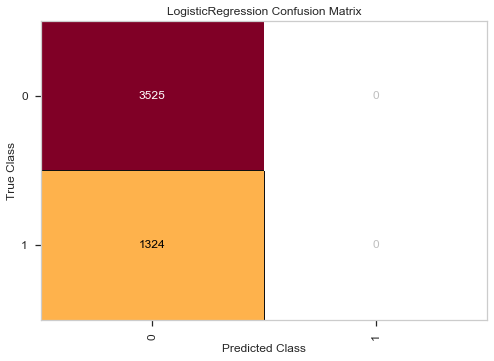

In [64]:
cm = ConfusionMatrix(clf);
cm.score(X_test, y_test);
cm.poof();

In [65]:
#  generates predictions by respecting the training set's class distribution
dummy1 = DummyClassifier(strategy='stratified', random_state=42).fit(X_train, y_train)
dummy1.fit(X_train, y_train)
dummy1.score(X_test, y_test)

0.6017735615590843

/Users/seohohahm/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/seohohahm/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


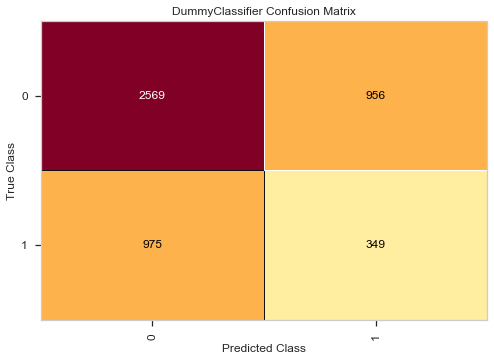

In [66]:
cm = ConfusionMatrix(dummy1);
cm.score(X_test, y_test);
cm.poof();

In [68]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      3525
           1       0.00      0.00      0.00      1324

    accuracy                           0.73      4849
   macro avg       0.36      0.50      0.42      4849
weighted avg       0.53      0.73      0.61      4849



/Users/seohohahm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
